In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load the data
filepath = '/content/DataSet_EU_3k_5k.xlsx'
df = pd.read_excel(filepath)

Scaled Features:
     Power_1   Power_2   Power_3   Power_4   Power_5   Power_6   Power_7  \
0 -0.627072 -0.619540 -0.422741 -0.417544 -0.422079 -0.623852 -0.434153   
1 -0.627072 -0.428600 -0.618699 -0.422270 -0.618282 -0.432992 -0.629027   
2 -0.627072 -0.619540 -0.618699 -0.420646 -0.618282 -0.623852 -0.629027   
3 -0.435928 -0.427249 -0.426130 -0.420755 -0.425414 -0.623852 -0.629027   
4 -0.627072 -0.619540 -0.431650 -0.614222 -0.430993 -0.623852 -0.629027   

    Power_8   Power_9  Power_10  ...   GSNR_69   GSNR_70   GSNR_71   GSNR_72  \
0 -0.619551 -0.420660 -0.609301  ...  3.028413 -0.655552 -0.648897 -0.646055   
1 -0.619551 -0.617312 -0.609301  ... -0.650901  3.109788 -0.648897 -0.646055   
2 -0.619551 -0.423774 -0.609301  ... -0.650901 -0.655552  3.041174 -0.646055   
3 -0.619551 -0.423705 -0.609301  ...  2.470694  2.341108  2.378514  2.551436   
4 -0.619551 -0.429681 -0.609301  ... -0.650901 -0.655552  2.526443  2.383195   

    GSNR_73   GSNR_74   GSNR_75   GSNR_76  No. Spa

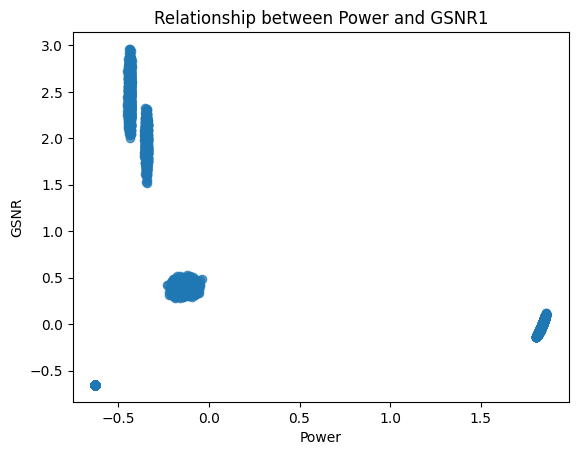

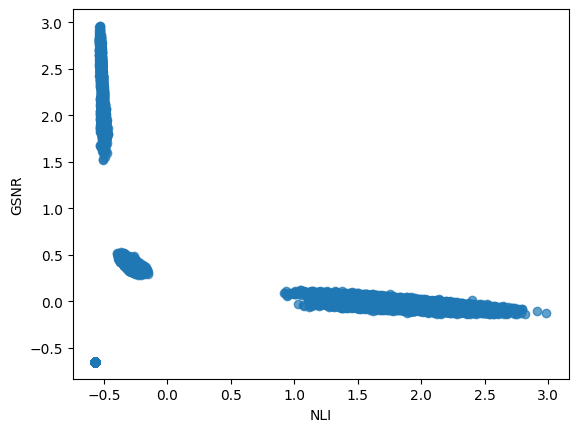

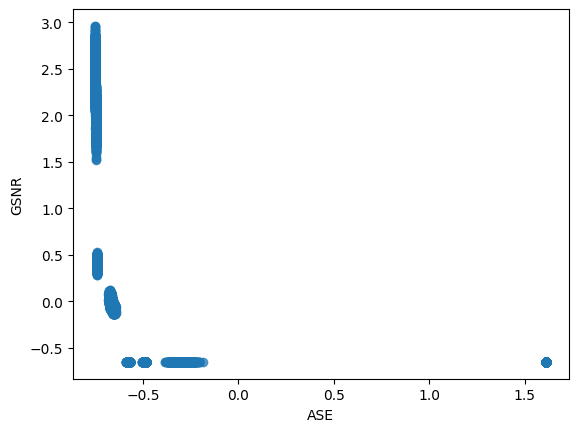

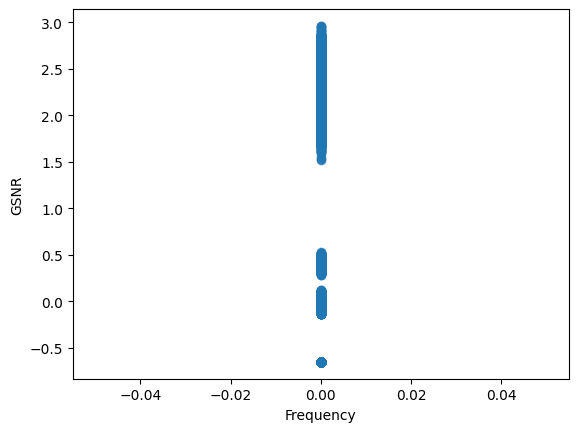

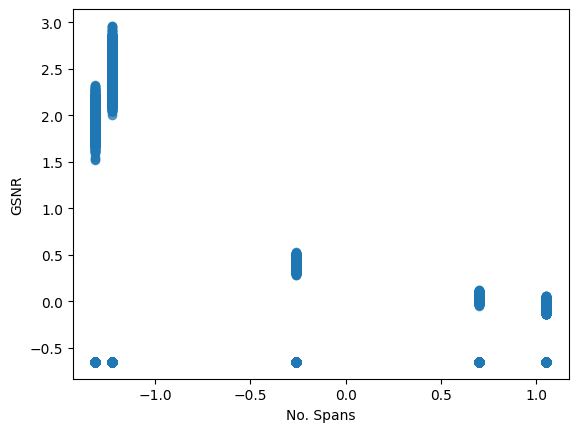

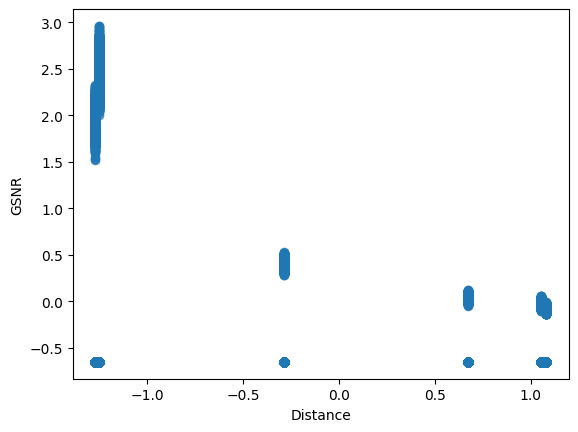

"\nfeatures_columns = [col for col in df.columns if 'frequency' in col]\nfeatures = df.drop(columns=features_columns)\nfeatures = df.drop(columns=gsnr_columns)\nfeatures.head()\nfeatures.info()\ntarget = df['GSNR_1']\ntarget.head()\ntarget.info()\n"

In [3]:
df.head()
df.dropna(inplace=True)
from sklearn.preprocessing import StandardScaler
gsnr_columns = [col for col in df.columns if 'GSNR' in col and col != 'GSNR_1']
# Select numerical columns for normalization
numerical_cols = df.select_dtypes(include=[float, int]).columns
data = df[numerical_cols].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
# Convert scaled data back to DataFrame if needed
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Display scaled features and target
print("Scaled Features:\n", scaled_df.head())

#As there are no non numeric columns, we will simply be assuming scaled_features_df as features data frame.
df = scaled_df

import matplotlib.pyplot as plt
plt.scatter(df['Power_1'], df['GSNR_1'], alpha=0.7)
plt.title('Relationship between Power and GSNR1')
plt.xlabel('Power')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['NLI_1'], df['GSNR_1'], alpha=0.7)
plt.xlabel('NLI')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['ASE_1'], df['GSNR_1'], alpha=0.7)
plt.xlabel('ASE')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['frequency_1'], df['GSNR_1'], alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['No. Spans'], df['GSNR_1'], alpha=0.7)
plt.xlabel('No. Spans')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['Total Distance(m)'], df['GSNR_1'], alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('GSNR')
plt.show()
'''
features_columns = [col for col in df.columns if 'frequency' in col]
features = df.drop(columns=features_columns)
features = df.drop(columns=gsnr_columns)
features.head()
features.info()
target = df['GSNR_1']
target.head()
target.info()
'''

In [9]:
# Get the unique values in the "No. Spans" column
unique_spans = df['No. Spans'].unique()

# Create a dictionary to store the datasets
span_datasets = {}

# Divide the dataset based on the "No. Spans" values
for span in unique_spans:
    span_datasets[span] = df[df['No. Spans'] == span]

# Save datasets with simple names
for i, (span, dataset) in enumerate(span_datasets.items(), start=1):
    filename = f"Dataset{i}.csv"
    dataset.to_csv(filename, index=False)
    print(f"Saved {filename} - Span: {span}, Shape: {dataset.shape}")

# Print summary
print(f"\nTotal datasets created: {len(span_datasets)}")

Saved Dataset1.csv - Span: -1.226310041194946, Shape: (3000, 382)
Saved Dataset2.csv - Span: 0.7007485949685405, Shape: (3000, 382)
Saved Dataset3.csv - Span: 1.0511228924528107, Shape: (6000, 382)
Saved Dataset4.csv - Span: -0.26278072311320266, Shape: (3000, 382)
Saved Dataset5.csv - Span: -1.3139036155660133, Shape: (3000, 382)

Total datasets created: 5


In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assuming that span_datasets_list[0], span_datasets_list[1], span_datasets_list[2] are the first three datasets
# span_datasets_list[3] is validation, and span_datasets_list[4] is the test dataset

# Client 1
features_client1 = torch.tensor(span_datasets_list[0].drop(columns=['GSNR_1']).values, dtype=torch.float32)
targets_client1 = torch.tensor(span_datasets_list[0]['GSNR_1'].values, dtype=torch.float32)
train_loader1 = DataLoader(TensorDataset(features_client1, targets_client1), batch_size=64, shuffle=True)

# Client 2
features_client2 = torch.tensor(span_datasets_list[1].drop(columns=['GSNR_1']).values, dtype=torch.float32)
targets_client2 = torch.tensor(span_datasets_list[1]['GSNR_1'].values, dtype=torch.float32)
train_loader2 = DataLoader(TensorDataset(features_client2, targets_client2), batch_size=64, shuffle=True)

# Client 3
features_client3 = torch.tensor(span_datasets_list[2].drop(columns=['GSNR_1']).values, dtype=torch.float32)
targets_client3 = torch.tensor(span_datasets_list[2]['GSNR_1'].values, dtype=torch.float32)
train_loader3 = DataLoader(TensorDataset(features_client3, targets_client3), batch_size=64, shuffle=True)

# Validation set
features_val = torch.tensor(span_datasets_list[3].drop(columns=['GSNR_1']).values, dtype=torch.float32)
targets_val = torch.tensor(span_datasets_list[3]['GSNR_1'].values, dtype=torch.float32)
val_loader = DataLoader(TensorDataset(features_val, targets_val), batch_size=64, shuffle=False)

# Test set
features_test = torch.tensor(span_datasets_list[4].drop(columns=['GSNR_1']).values, dtype=torch.float32)
targets_test = torch.tensor(span_datasets_list[4]['GSNR_1'].values, dtype=torch.float32)
test_loader = DataLoader(TensorDataset(features_test, targets_test), batch_size=64, shuffle=False)


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models

class ResNetForTabular(nn.Module):
    def __init__(self, input_dim):
        super(ResNetForTabular, self).__init__()
        # Load pre-trained ResNet model
        self.base_model = models.resnet50(pretrained=True)
        # Modify the first convolutional layer to accept 1 channel input
        self.base_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # Modify the final fully connected layer
        self.base_model.fc = nn.Linear(self.base_model.fc.in_features, 128)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 1)

        # Freeze all layers except the new layers
        for param in self.base_model.parameters():
            param.requires_grad = False
        # Unfreeze the fully connected layers
        for param in self.base_model.fc.parameters():
            param.requires_grad = True
        for param in self.fc1.parameters():
            param.requires_grad = True
        for param in self.fc2.parameters():
            param.requires_grad = True

    def forward(self, x):
        x = x.unsqueeze(1).unsqueeze(-1)  # Adapt input dimensions for ResNet
        x = self.base_model(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        train_loss = 0
        for features, target in train_loader:
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, target.unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for features, target in val_loader:
                outputs = model(features)
                loss = criterion(outputs, target.unsqueeze(1))
                val_loss += loss.item()
        val_loss /= len(val_loader)
        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Example DataLoader Initialization
# Replace these with actual data loaders for your datasets
train_loader1 = DataLoader(TensorDataset(features_client1, targets_client1), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(features_val, targets_val), batch_size=32, shuffle=False)

# Initialize and train models
for i, (train_loader, input_dim) in enumerate(zip([train_loader1, train_loader2, train_loader3],
                                                   [features_client1.shape[1], features_client2.shape[1], features_client3.shape[1]])):
    print(f"\nInitializing and training model for Client {i + 1}...")
    model = ResNetForTabular(input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5)  # Use fewer epochs for testing



Initializing and training model for Client 1...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 156MB/s]


Epoch 1/5, Train Loss: 2.4978, Val Loss: 0.5613
Epoch 2/5, Train Loss: 2.4573, Val Loss: 1.0977
Epoch 3/5, Train Loss: 2.4001, Val Loss: 1.1052
Epoch 4/5, Train Loss: 2.2755, Val Loss: 1.0284
Epoch 5/5, Train Loss: 2.2525, Val Loss: 2.3174

Initializing and training model for Client 2...
Epoch 1/5, Train Loss: 0.1689, Val Loss: 0.2854
Epoch 2/5, Train Loss: 0.1348, Val Loss: 0.3446
Epoch 3/5, Train Loss: 0.1193, Val Loss: 0.2864
Epoch 4/5, Train Loss: 0.1226, Val Loss: 0.2879
Epoch 5/5, Train Loss: 0.1170, Val Loss: 0.2998

Initializing and training model for Client 3...
Epoch 1/5, Train Loss: 0.1149, Val Loss: 0.3308
Epoch 2/5, Train Loss: 0.0934, Val Loss: 0.2751
Epoch 3/5, Train Loss: 0.0896, Val Loss: 0.2874
Epoch 4/5, Train Loss: 0.0885, Val Loss: 0.3178
Epoch 5/5, Train Loss: 0.0847, Val Loss: 0.3018


In [14]:
# Function to extract features using pretrained ResNet
def extract_features(model, dataloader, device):
    model.eval()
    features_list = []
    with torch.no_grad():
        for data, _ in dataloader:
            data = data.to(device)
            features = model(data)
            features_list.append(features.cpu().numpy())
    return np.vstack(features_list)

# Initialize ResNet model and device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet_model = ResNetForTabular(input_dim=1).to(device)

In [16]:
import  numpy as np
# Extract features for training, validation, and test sets
train_features_client1 = extract_features(resnet_model, train_loader1, device)
train_features_client2 = extract_features(resnet_model, train_loader2, device)
train_features_client3 = extract_features(resnet_model, train_loader3, device)
val_features = extract_features(resnet_model, val_loader, device)
test_features = extract_features(resnet_model, test_loader, device)

# Combine features from different clients
X_train = np.concatenate([train_features_client1, train_features_client2, train_features_client3], axis=0)

# Convert targets to numpy arrays and concatenate
y_train = np.concatenate([targets_client1.numpy(), targets_client2.numpy(), targets_client3.numpy()], axis=0)

In [18]:
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from torchvision import models

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize base learners
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()

# Train base learners
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Generate predictions from base learners
train_preds_rf = rf_model.predict(X_train)
train_preds_gb = gb_model.predict(X_train)
train_preds_xgb = xgb_model.predict(X_train)

# Stack the predictions
X_meta = np.column_stack((train_preds_rf, train_preds_gb, train_preds_xgb))

# Train the meta-learner
meta_model = LinearRegression()
meta_model.fit(X_meta, y_train)

# Validation predictions
val_preds_rf = rf_model.predict(val_features)
val_preds_gb = gb_model.predict(val_features)
val_preds_xgb = xgb_model.predict(val_features)

X_val_meta = np.column_stack((val_preds_rf, val_preds_gb, val_preds_xgb))
val_preds = meta_model.predict(X_val_meta)

# Evaluate on the validation set
val_mse = mean_squared_error(targets_val.numpy(), val_preds)
val_mae = mean_absolute_error(targets_val.numpy(), val_preds)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(targets_val.numpy(), val_preds)

print(f'Validation MSE: {val_mse:.4f}')
print(f'Validation MAE: {val_mae:.4f}')
print(f'Validation RMSE: {val_rmse:.4f}')
print(f'Validation R²: {val_r2:.4f}')

# Test predictions
test_preds_rf = rf_model.predict(test_features)
test_preds_gb = gb_model.predict(test_features)
test_preds_xgb = xgb_model.predict(test_features)

X_test_meta = np.column_stack((test_preds_rf, test_preds_gb, test_preds_xgb))
test_preds = meta_model.predict(X_test_meta)

# Evaluate on the test set
test_mse = mean_squared_error(targets_test.numpy(), test_preds)
test_mae = mean_absolute_error(targets_test.numpy(), test_preds)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(targets_test.numpy(), test_preds)

print(f'Test MSE: {test_mse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test R²: {test_r2:.4f}')


Validation MSE: 1.3888
Validation MAE: 0.8819
Validation RMSE: 1.1785
Validation R²: -4.0262
Test MSE: 2.8869
Test MAE: 1.3114
Test RMSE: 1.6991
Test R²: -0.6978


In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize base learners
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()

# Train base learners
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Generate predictions from base learners
train_preds_rf = rf_model.predict(X_train)
train_preds_gb = gb_model.predict(X_train)
train_preds_xgb = xgb_model.predict(X_train)

# Stack the predictions
X_meta = np.column_stack((train_preds_rf, train_preds_gb, train_preds_xgb))

# Train the meta-learner
meta_model = LinearRegression()
meta_model.fit(X_meta, y_train)

# Validation predictions
val_preds_rf = rf_model.predict(val_features)
val_preds_gb = gb_model.predict(val_features)
val_preds_xgb = xgb_model.predict(val_features)

X_val_meta = np.column_stack((val_preds_rf, val_preds_gb, val_preds_xgb))
val_preds = meta_model.predict(X_val_meta)

# Evaluate on the validation set
val_mse = mean_squared_error(targets_val.numpy(), val_preds)
val_mae = mean_absolute_error(targets_val.numpy(), val_preds)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(targets_val.numpy(), val_preds)

print(f'Validation MSE: {val_mse:.4f}')
print(f'Validation MAE: {val_mae:.4f}')
print(f'Validation RMSE: {val_rmse:.4f}')
print(f'Validation R²: {val_r2:.4f}')

# Test predictions
test_preds_rf = rf_model.predict(test_features)
test_preds_gb = gb_model.predict(test_features)
test_preds_xgb = xgb_model.predict(test_features)

X_test_meta = np.column_stack((test_preds_rf, test_preds_gb, test_preds_xgb))
test_preds = meta_model.predict(X_test_meta)

# Evaluate on the test set
test_mse = mean_squared_error(targets_test.numpy(), test_preds)
test_mae = mean_absolute_error(targets_test.numpy(), test_preds)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(targets_test.numpy(), test_preds)

print(f'Test MSE: {test_mse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test R²: {test_r2:.4f}')


Validation MSE: 1.3991
Validation MAE: 0.8794
Validation RMSE: 1.1828
Validation R²: -4.0635
Test MSE: 2.8968
Test MAE: 1.3142
Test RMSE: 1.7020
Test R²: -0.7036


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, data_loader, targets):
    model.eval()  # Set model to evaluation mode
    preds = []
    actuals = []

    with torch.no_grad():
        for features, target in data_loader:
            outputs = model(features).squeeze(1)
            preds.append(outputs.cpu().numpy())
            actuals.append(target.cpu().numpy())

    preds = np.concatenate(preds, axis=0)
    actuals = np.concatenate(actuals, axis=0)

    mse = mean_squared_error(actuals, preds)
    mae = mean_absolute_error(actuals, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(actuals, preds)

    return mse, mae, rmse, r2

# Assuming you have a DataLoader for the test set
test_loader = DataLoader(TensorDataset(features_test, targets_test), batch_size=32, shuffle=False)

# Example for evaluating the first model trained for Client 1
mse_val, mae_val, rmse_val, r2_val = evaluate_model(model, val_loader, targets_val)
mse_test, mae_test, rmse_test, r2_test = evaluate_model(model, test_loader, targets_test)

print(f"Validation Set Evaluation:\n MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test Set Evaluation:\n MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")


Validation Set Evaluation:
 MSE: 0.3019, MAE: 0.5032, RMSE: 0.5494, R²: -0.0924
Test Set Evaluation:
 MSE: 2.9954, MAE: 1.2462, RMSE: 1.7307, R²: -0.7616
